In [1]:
%matplotlib inline

In [277]:
from colour.plotting import *
import colour
import colour.plotting
import colour.io
import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
from numpy import array, zeros, linspace, float64, savetxt
from scipy import interpolate, vectorize
from scipy.signal import argrelextrema, argrelmax, savgol_filter, resample
from sklearn.preprocessing import normalize
from itertools import izip
import csv

In [91]:
img = PIL.Image.open("DSC_0064.JPG")
#imgmp = mpimg.imread('DSC_0064.JPG')

In [92]:
print(img.format, img.size, img.mode)

JPEG (3840, 2160) RGB


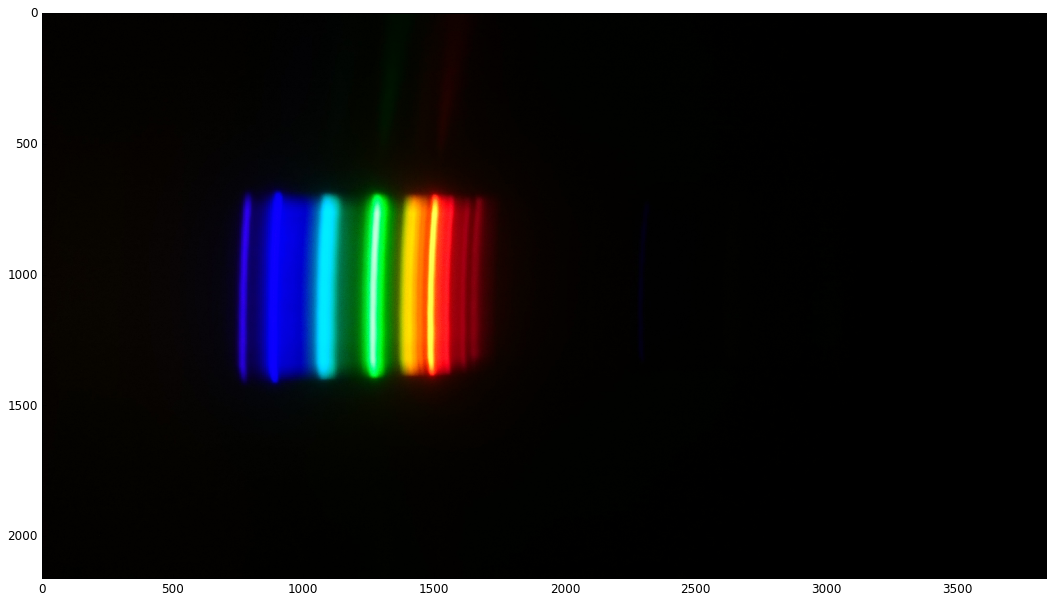

In [93]:
#img.show()
plt.imshow(np.asarray(img))

In [96]:
greyscale_img = img.convert("LA")
print(greyscale_img.format, greyscale_img.size, greyscale_img.mode)
greyscale_img.getextrema()

None (3840, 2160) LA


((0, 236), (255, 255))

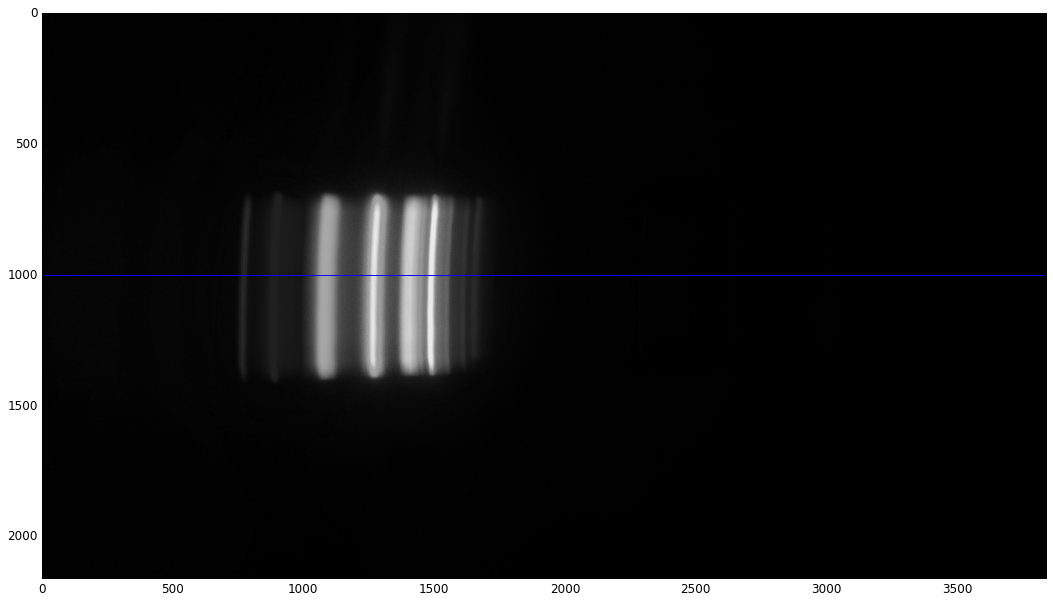

In [163]:
plt.imshow(greyscale_img)
plt.axhline(1000)

In [7]:
pixels = greyscale_img.load()

In [98]:
pix = array(greyscale_img)

In [101]:
pix.shape, pix.ndim

((2160, 3840, 2), 3)

In [102]:
data_row = pix[1000] # sample at specific row / horizontal line

In [103]:
numpy.take(data_row,0,1)[100:2000]

array([6, 6, 6, ..., 2, 2, 2], dtype=uint8)

3840


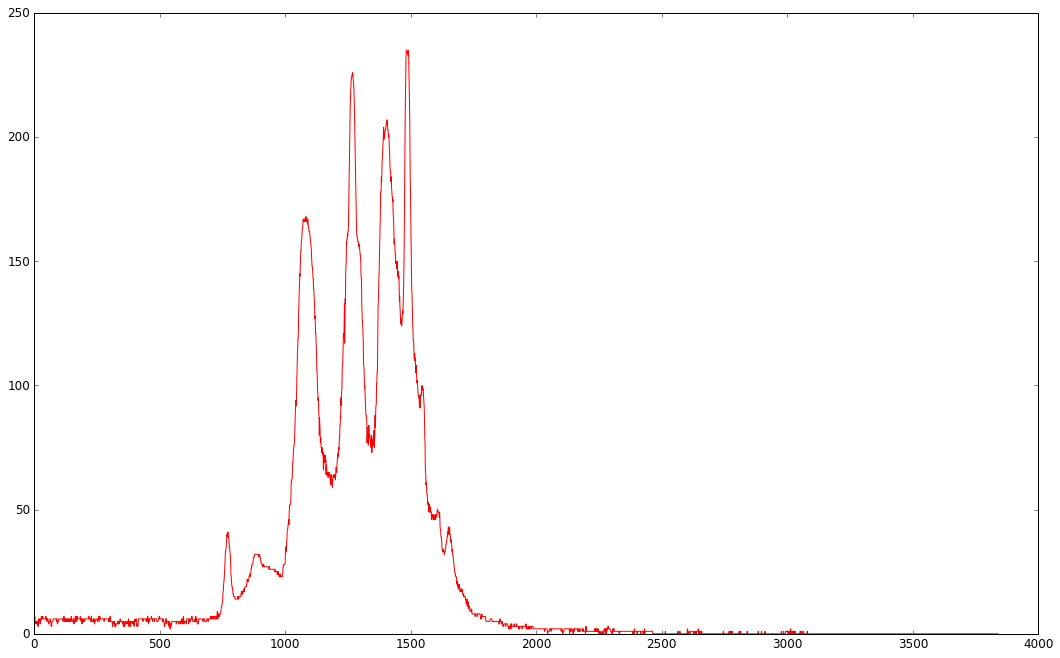

In [104]:
#plt.plot(numpy.take(pix[1100],0,1)[100:2000])
spectrum = numpy.take(data_row,0,1)
print(len(spectrum))
plt.plot(spectrum)

/Users/francesco.anselmo/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


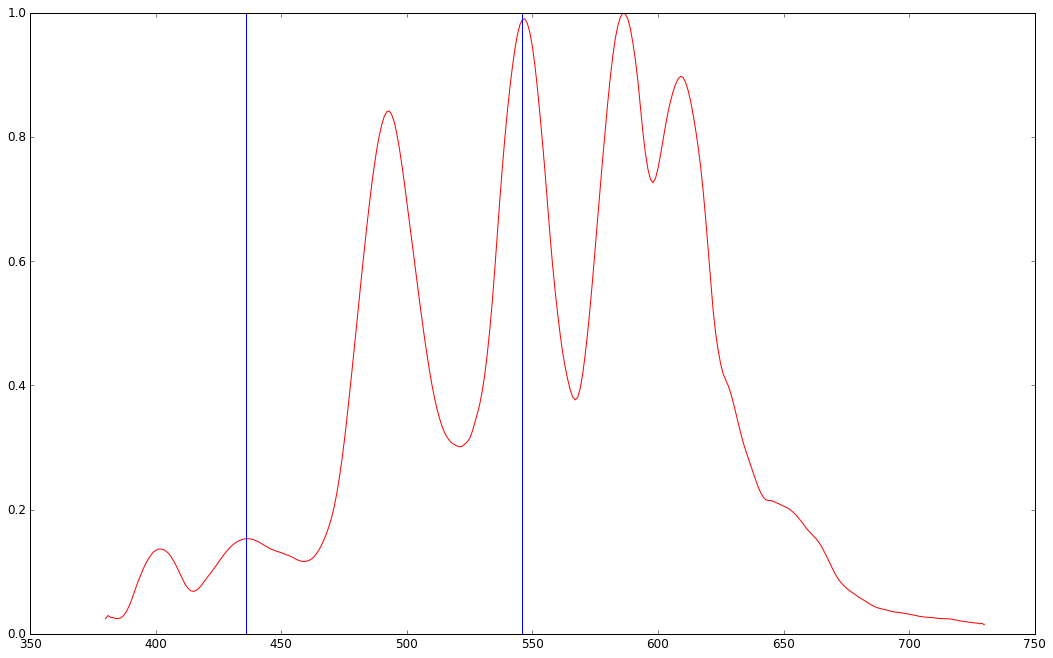

In [263]:
trimLeft = 700
trimRight = 1900
x = np.linspace(trimLeft,trimRight,trimRight-trimLeft+1)
#print(x)
#newSpectrum = interpolate.InterpolatedUnivariateSpline(x,spectrum,k=2)
#newX = interpolate.InterpolatedUnivariateSpline(x,x,k=2)
newSpectrum = savgol_filter(spectrum, 101, 2)
normalizedSpectrum = normalize(newSpectrum[trimLeft:trimRight+1],'max').reshape(-1,1)
resampledSpectrum = resample(normalizedSpectrum,730-380+1)
#print(resampledSpectrum)
xx = np.linspace(380,730,730-380+1)
#print(len(xx), len(resampledSpectrum))

plt.plot(xx,resampledSpectrum) # trim spectrum

# second blue wavelength is 436 nm, green wavelength is 546 nm
plt.axvline(x=436)
plt.axvline(x=546)

In [266]:
spd_data = dict(izip(xx, resampledSpectrum))

In [267]:
spd = colour.SpectralPowerDistribution(
    'Compact Fluorescent Lighting', spd_data)

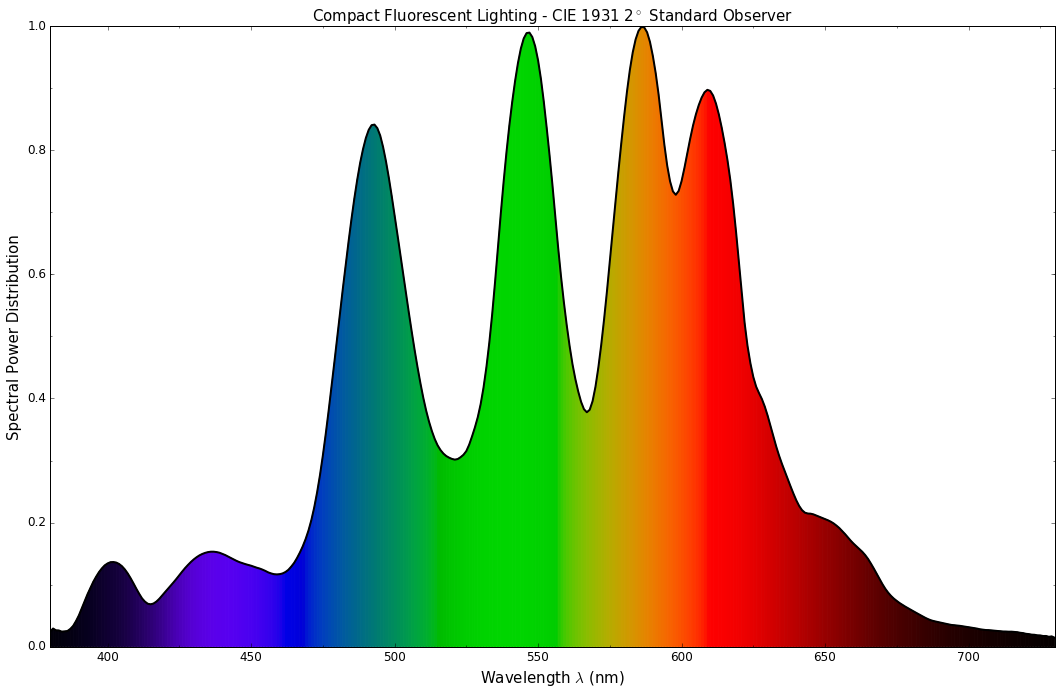

In [238]:
single_spd_plot(spd)

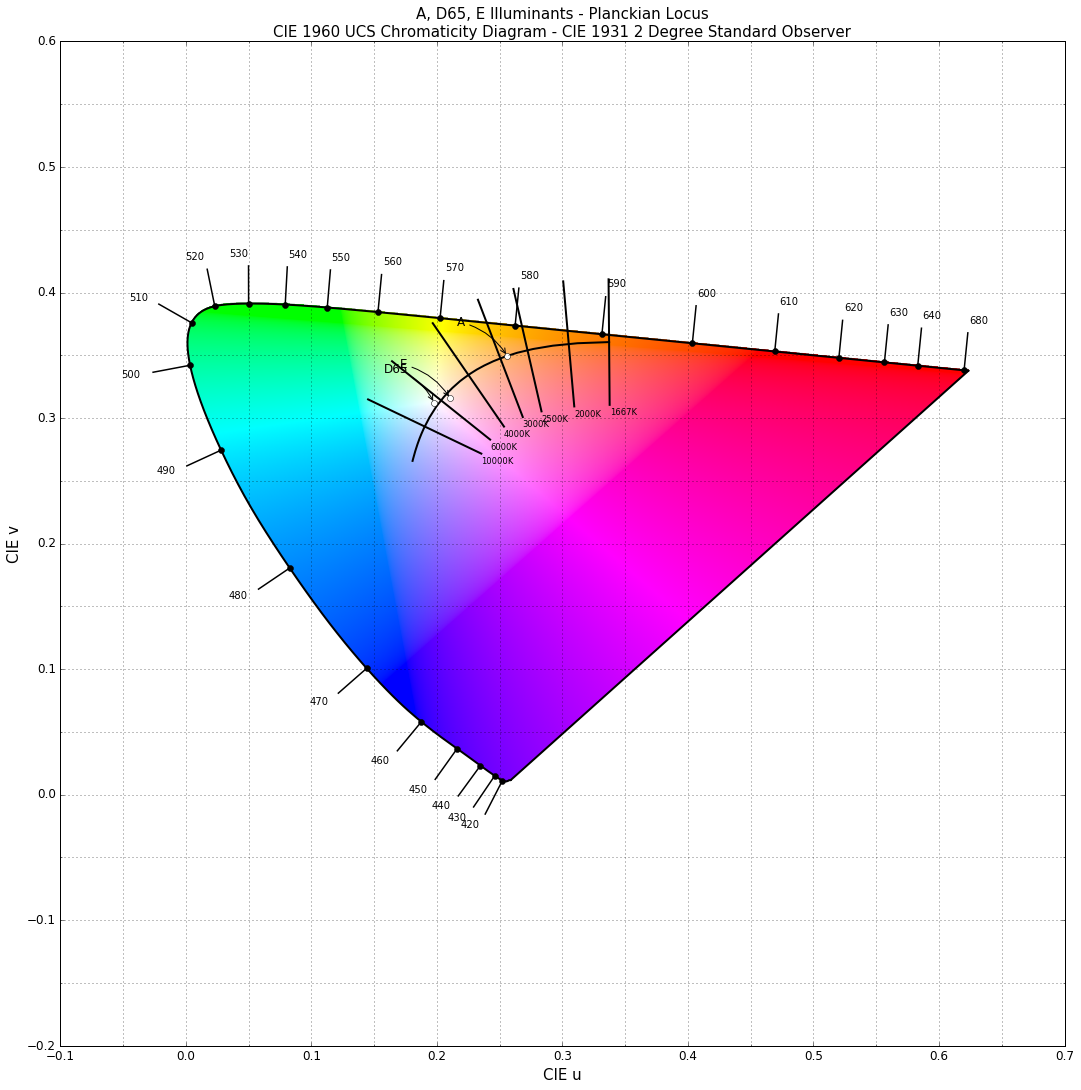

In [241]:
planckian_locus_CIE_1960_UCS_chromaticity_diagram_plot(['A', 'D65', 'E'])

In [265]:
print(dir(spd))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__pow__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_arithmetical_operation', '_data', '_name', '_title', 'align', 'clone', 'data', 'extrapolate', 'get', 'interpolate', 'is_uniform', 'items', 'name', 'normalise', 'shape', 'title', 'trim_wavelengths', 'values', 'wavelengths', 'zeros']


In [268]:
print(spd.wavelengths)

[ 380.  381.  382.  383.  384.  385.  386.  387.  388.  389.  390.  391.
  392.  393.  394.  395.  396.  397.  398.  399.  400.  401.  402.  403.
  404.  405.  406.  407.  408.  409.  410.  411.  412.  413.  414.  415.
  416.  417.  418.  419.  420.  421.  422.  423.  424.  425.  426.  427.
  428.  429.  430.  431.  432.  433.  434.  435.  436.  437.  438.  439.
  440.  441.  442.  443.  444.  445.  446.  447.  448.  449.  450.  451.
  452.  453.  454.  455.  456.  457.  458.  459.  460.  461.  462.  463.
  464.  465.  466.  467.  468.  469.  470.  471.  472.  473.  474.  475.
  476.  477.  478.  479.  480.  481.  482.  483.  484.  485.  486.  487.
  488.  489.  490.  491.  492.  493.  494.  495.  496.  497.  498.  499.
  500.  501.  502.  503.  504.  505.  506.  507.  508.  509.  510.  511.
  512.  513.  514.  515.  516.  517.  518.  519.  520.  521.  522.  523.
  524.  525.  526.  527.  528.  529.  530.  531.  532.  533.  534.  535.
  536.  537.  538.  539.  540.  541.  542.  543.  5

In [269]:

print(spd.values)

[ 0.02440988  0.02947684  0.02651513  0.02634618  0.0244478   0.02481574
  0.02541147  0.02869603  0.03363112  0.04144843  0.05058579  0.0620107
  0.07321387  0.0846529   0.09481435  0.10459521  0.1128607   0.12034429
  0.12630289  0.13122827  0.13434444  0.13635039  0.13657271  0.13576826
  0.13346257  0.12988466  0.12474252  0.11831058  0.11069584  0.10241287
  0.09362551  0.0854879   0.07788965  0.0727384   0.06923383  0.06835092
  0.06962437  0.07277639  0.07712173  0.08272397  0.08797395  0.09320816
  0.09848727  0.1039604   0.10952237  0.11541189  0.12124881  0.12683125
  0.13183988  0.13655611  0.14074262  0.14428427  0.14730667  0.14962072
  0.15133932  0.15261578  0.15323486  0.15325905  0.15258455  0.15160753
  0.14973429  0.14781202  0.14550103  0.14296035  0.14061087  0.13825881
  0.13624361  0.13470393  0.13316289  0.13192478  0.13065465  0.12899561
  0.12732312  0.12612787  0.12428166  0.1222568   0.11974539  0.1181323
  0.11691943  0.11648153  0.11701344  0.1180791   0.1

In [270]:
output_data = dict(zip(spd.wavelengths,spd.values))
print(output_data)

{380.0: 0.024409884324227971, 381.0: 0.029476844196326422, 382.0: 0.026515131398232531, 383.0: 0.026346178237841508, 384.0: 0.024447796701817015, 385.0: 0.024815741383120874, 386.0: 0.025411467556641164, 387.0: 0.02869602651554911, 388.0: 0.033631117220481267, 389.0: 0.041448433110492323, 390.0: 0.050585785273028802, 391.0: 0.062010699937441426, 392.0: 0.073213869981183996, 393.0: 0.084652896791971036, 394.0: 0.094814354986180002, 395.0: 0.10459521122995401, 396.0: 0.11286069956296127, 397.0: 0.1203442896866055, 398.0: 0.12630288718133184, 399.0: 0.13122827265941833, 400.0: 0.13434443978775168, 401.0: 0.13635038630423868, 402.0: 0.13657271014126204, 403.0: 0.13576826173476247, 404.0: 0.13346256640853651, 405.0: 0.12988465612032349, 406.0: 0.12474251708849798, 407.0: 0.11831057964680987, 408.0: 0.11069584203284724, 409.0: 0.10241287165599193, 410.0: 0.093625514322707534, 411.0: 0.085487903186038286, 412.0: 0.077889654311219469, 413.0: 0.072738402044216749, 414.0: 0.069233826658975622, 4

In [284]:
out = csv.writer(open("output_data.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(spd.wavelengths)
out.writerow(spd.values)

6006